   ## GRIPOCTOBER21           
   # THE SPARK FOUNDATION

   ## TASK NO - 3
   ## Computer Vision and Internt of Things TASK
    
  ## Object Detection/Optical Character Recogntion
 
# AUTHOR = SHUBHAM SHARMA


### Install azure package neccessary for the exceution of the code

In [2]:
pip install azure-cognitiveservices-vision-customvision

Note: you may need to restart the kernel to use updated packages.


### Input the project id , key , endpoint and model name of the custom vision resource

In [8]:
project_id = '3a202d70-8a8c-4a0e-9850-2b4130f31ccb' 
cv_key = '0351495dd99e4e85afe47dbb359fb649' 
cv_endpoint = 'https://mucst1-prediction.cognitiveservices.azure.com/' 
model_name = 'detect-produce' 
print('Ready to predict using model {} in project {}'.format(model_name, project_id))


Ready to predict using model detect-produce in project 3a202d70-8a8c-4a0e-9850-2b4130f31ccb


### import the necessary packages

In [ ]:
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from msrest.authentication import ApiKeyCredentials
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import os
%matplotlib inline

### Load a test image and get its dimensions

In [13]:
test_img_file = os.path.join('Downloads/ob_detect/combo5.jpeg')
test_img = Image.open(test_img_file)
test_img_h, test_img_w, test_img_ch = np.array(test_img).shape

### Get a prediction client for the object detection model

In [14]:

credentials = ApiKeyCredentials(in_headers={"Prediction-key": cv_key})
predictor = CustomVisionPredictionClient(endpoint=cv_endpoint, credentials=credentials)

print('Detecting objects in {} using model {} in project {}...'.format(test_img_file, model_name, project_id))

Detecting objects in Downloads/ob_detect/combo5.jpeg using model detect-produce in project 3a202d70-8a8c-4a0e-9850-2b4130f31ccb...


### Detect objects in the test image

In [15]:
with open(test_img_file, mode="rb") as test_data:
    results = predictor.detect_image(project_id, model_name, test_data)

### Display the image with boxes around each detected object

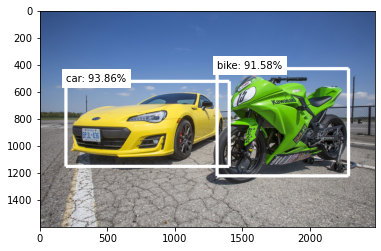

In [18]:
draw = ImageDraw.Draw(test_img)
lineWidth = int(np.array(test_img).shape[1]/100)
for prediction in results.predictions:
    color = 'white' # default for 'other' object tags
    if (prediction.probability*100) > 50:
        if prediction.tag_name in object_colors:
            color = object_colors[prediction.tag_name]
        left = prediction.bounding_box.left * test_img_w 
        top = prediction.bounding_box.top * test_img_h 
        height = prediction.bounding_box.height * test_img_h
        width =  prediction.bounding_box.width * test_img_w
        points = ((left,top), (left+width,top), (left+width,top+height), (left,top+height),(left,top))
        draw.line(points, fill=color, width=lineWidth)
        plt.annotate(prediction.tag_name + ": {0:.2f}%".format(prediction.probability * 100),(left,top), backgroundcolor=color)
plt.imshow(test_img)
plt.show()